In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

## Importing Data

In [126]:
df = pd.read_csv('dataset.csv')

In [127]:
df = df.iloc[:, 1:]

In [128]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [129]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [130]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Data Cleaning

In [131]:
df.select_dtypes(exclude=['number'])

,track_id,artists,album_name,track_name,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic
...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,False,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,False,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,False,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,False,world-music


In [132]:
df['explicit'] = df['explicit'].astype(int)


In [133]:
df['explicit'].value_counts()

explicit
0    104253
1      9747
Name: count, dtype: int64

## Exploratory Data Analysis

In [134]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [135]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
explicit,114000.0,0.085500,0.279626,0.000,0.00000,0.000000,0.0000,1.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [136]:
df['album_name'].value_counts()

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
A Greater Song (Live)            1
This is Thetahealing             1
Phenomena (DA DA) Remixes        1
What A Beautiful Name - EP       1
The Boy Who Never                1
Name: count, Length: 46589, dtype: int64

In [137]:
df['artists'].value_counts()

artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Hillsong Worship;TAYA;David Ware        1
for KING & COUNTRY;Andy Mineo           1
Bethel Music;Francesca Battistelli      1
Descansa                                1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64

In [138]:
df['track_genre'].value_counts()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64

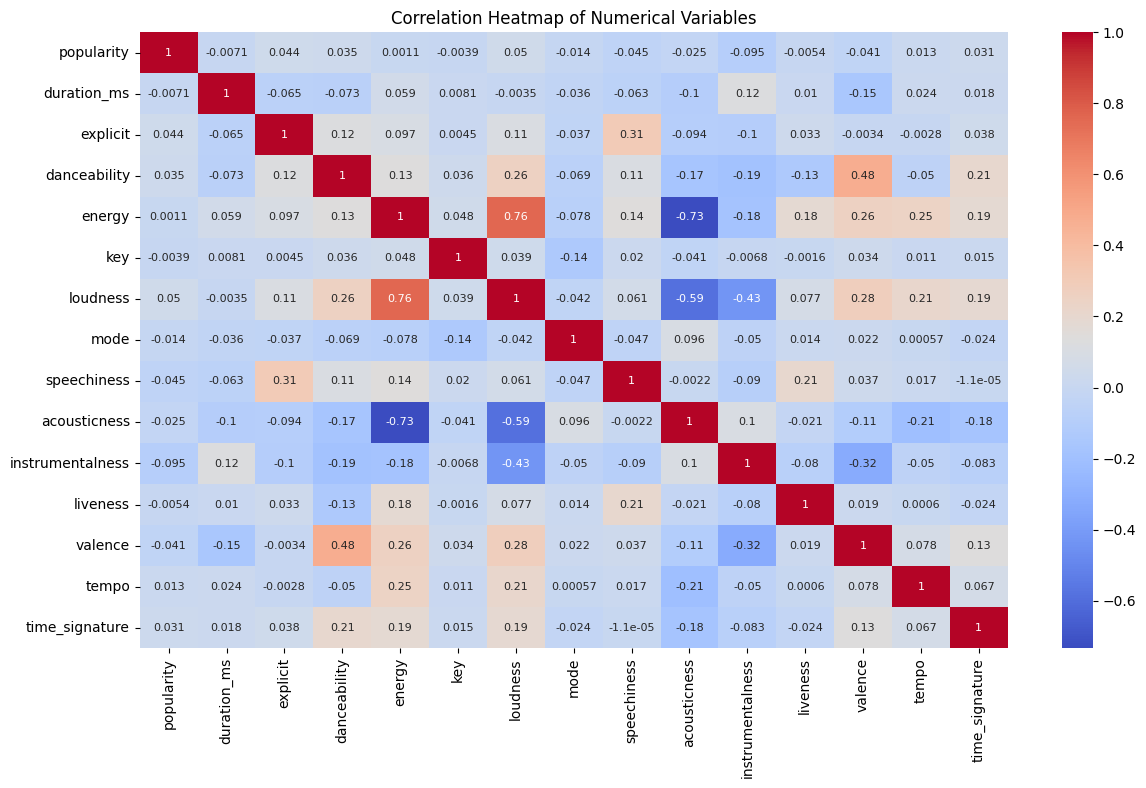

In [139]:
numerical= df.select_dtypes(exclude = ['object'])
correlation_matrix = numerical.corr()

plt.figure(figsize = (14, 8))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', annot_kws={'size': 8})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Missing Values

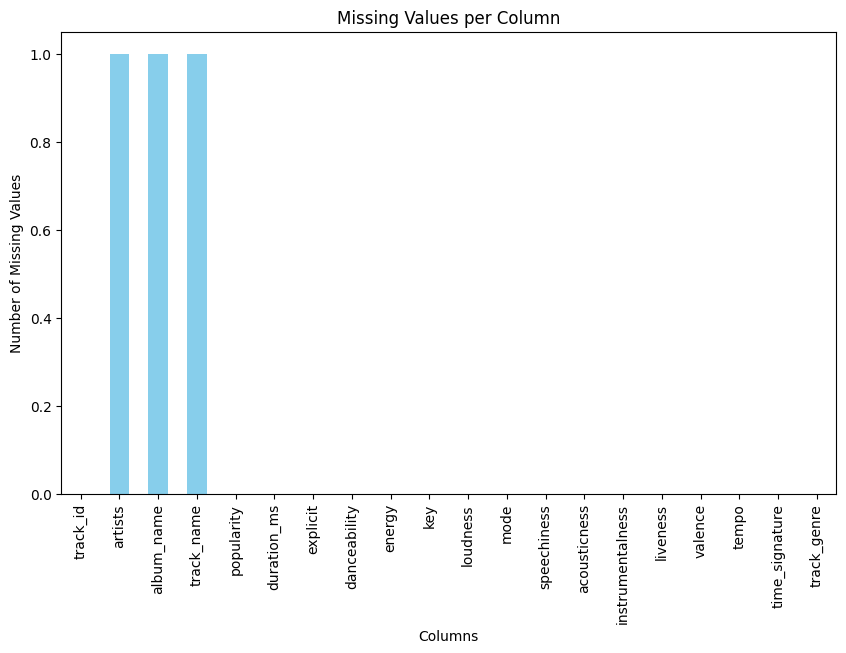

In [140]:
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

Let's find where those 3 missing values are and if they all are in the same song/row or not:

In [141]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


All the missing values are in the row above, and it looks like even non-missing values, some of them, contain the equivalent of null. For example, the duration here is 0, which would be the same as null since a song cannot have a duration of 0 if the value is inputted correctly.

Considering the missing and invalid values in this row, it would be best for our analysis to remove it from the dataset.

In [142]:
df = df.drop(index=65900)
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


#### Valid Values

For some of the columns, we know the range the values can take. So, based on that, we can calculate the number of inputs that are outside of the given range for each column that has a range of valid values.

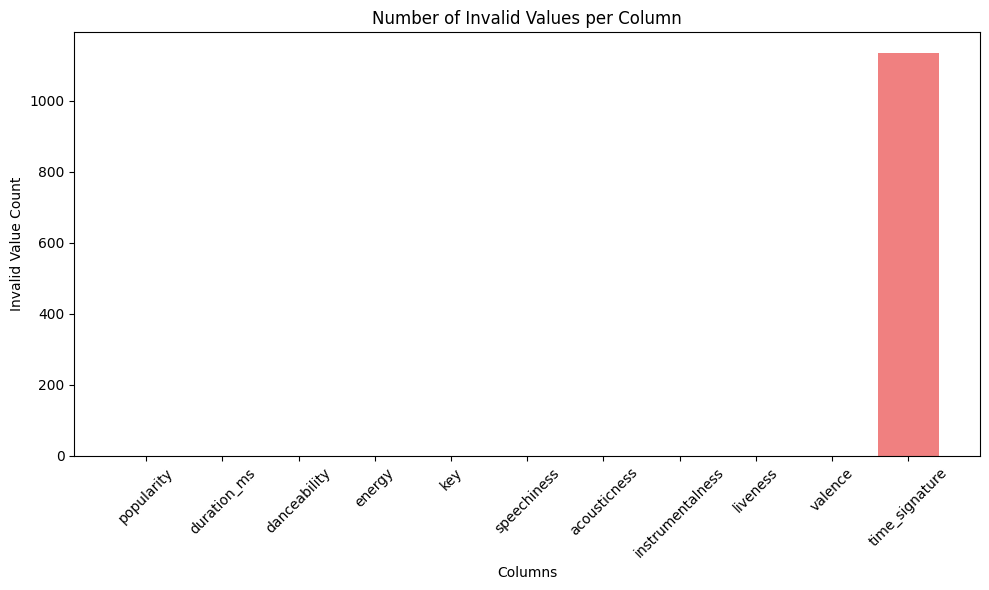

,Column,Invalid Values
0,popularity,0
1,duration_ms,0
2,danceability,0
3,energy,0
4,key,0
5,speechiness,0
6,acousticness,0
7,instrumentalness,0
8,liveness,0
9,valence,0


In [143]:
ranges = {
    'popularity': (0, 100),
    'duration_ms': (1, float('inf')),
    'danceability': (0.0, 1.0),
    'energy': (0.0, 1.0),
    'key': (-1, 11), 
    'speechiness': (0.0, 1.0),
    'acousticness': (0.0, 1.0),
    'instrumentalness': (0.0, 1.0),
    'liveness': (0.0, 1.0),
    'valence': (0.0, 1.0),
    'time_signature': (3, 7), 
}

def count_invalid_values(df, ranges):
    invalid_counts = {}
    
    for col, (min_val, max_val) in ranges.items():
        invalid_counts[col] = ((df[col] < min_val) | (df[col] > max_val)).sum()
    
    return invalid_counts

invalid_counts = count_invalid_values(df, ranges)

invalid_df = pd.DataFrame(list(invalid_counts.items()), columns=['Column', 'Invalid Values'])

plt.figure(figsize=(10, 6))
plt.bar(invalid_df['Column'], invalid_df['Invalid Values'], color='lightcoral')
plt.xticks(rotation=45)
plt.title('Number of Invalid Values per Column')
plt.xlabel('Columns')
plt.ylabel('Invalid Value Count')
plt.tight_layout()
plt.show()
invalid_df

In [144]:
df[(df['time_signature'] < 3) | (df['time_signature'] > 7)]['time_signature'].unique()

array([1, 0])

In [145]:
df['time_signature'].value_counts()

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

In [146]:
df[(df['time_signature'] < 3) | (df['time_signature'] > 7)]['time_signature'].value_counts()

time_signature
1    973
0    163
Name: count, dtype: int64

In [147]:
# getting rid of the rows where time signature is invalid
df = df[(df['time_signature'] >= 3) & (df['time_signature'] <= 7)]

In [148]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Distribution of Popularity

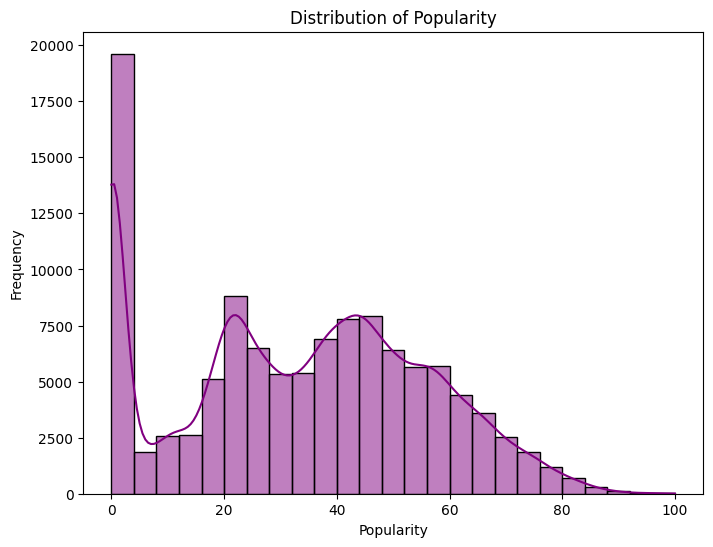

In [149]:
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], kde=True, color='purple', bins=25)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

#### Top 10 Genres by Average Popularity

In [150]:
df['track_genre'].nunique()

114

There are 114 different genres in our dataset, so plotting all of them will be difficult to interpret. Instead, we can plot the top 10 genres based on their average popularity scores.

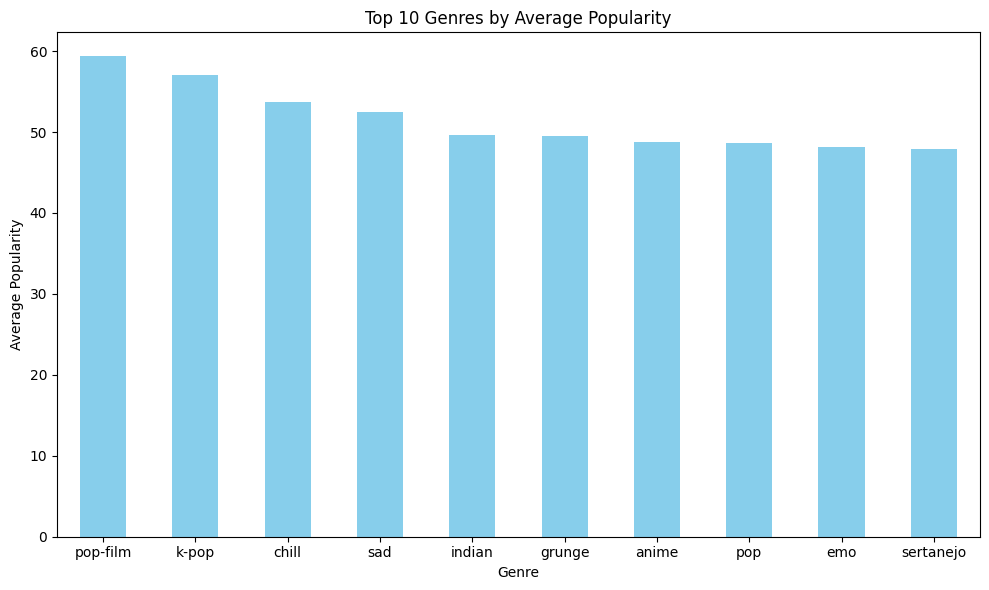

In [151]:
top_n_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_n_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Popularity vs. Track Duration

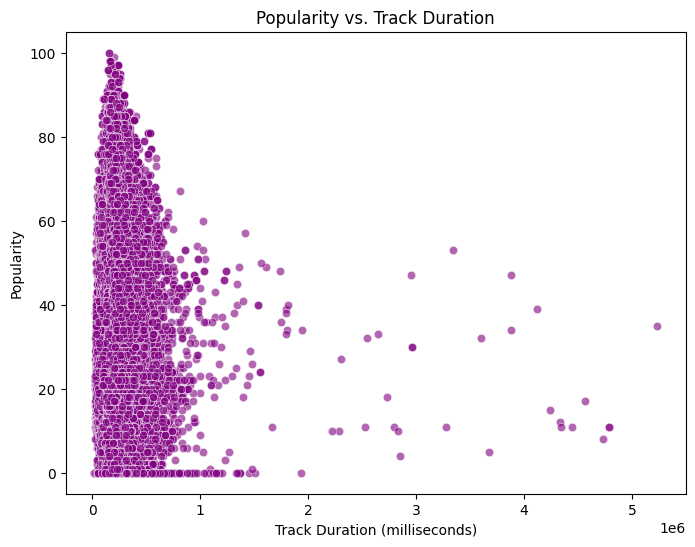

In [152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['duration_ms'], y=df['popularity'], color='purple', alpha=0.6)
plt.title('Popularity vs. Track Duration')
plt.xlabel('Track Duration (milliseconds)')
plt.ylabel('Popularity')
plt.show()


#### Popularity Distribution by Explicit Lyrics

C:\Users\YooNi\AppData\Local\Temp\ipykernel_23140\1092402988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit', y='popularity', data=df, palette='Blues' )


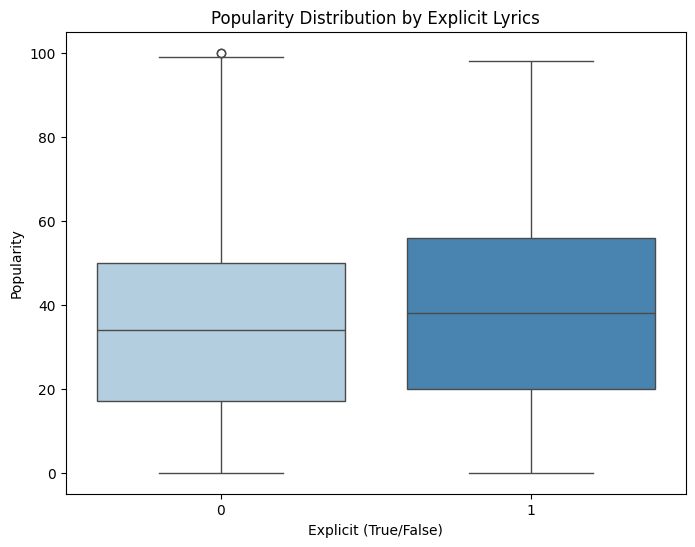

In [153]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='explicit', y='popularity', data=df, palette='Blues' )
plt.title('Popularity Distribution by Explicit Lyrics')
plt.xlabel('Explicit (True/False)')
plt.ylabel('Popularity')
plt.show()

#### Top 10 Artists by Average Popularity

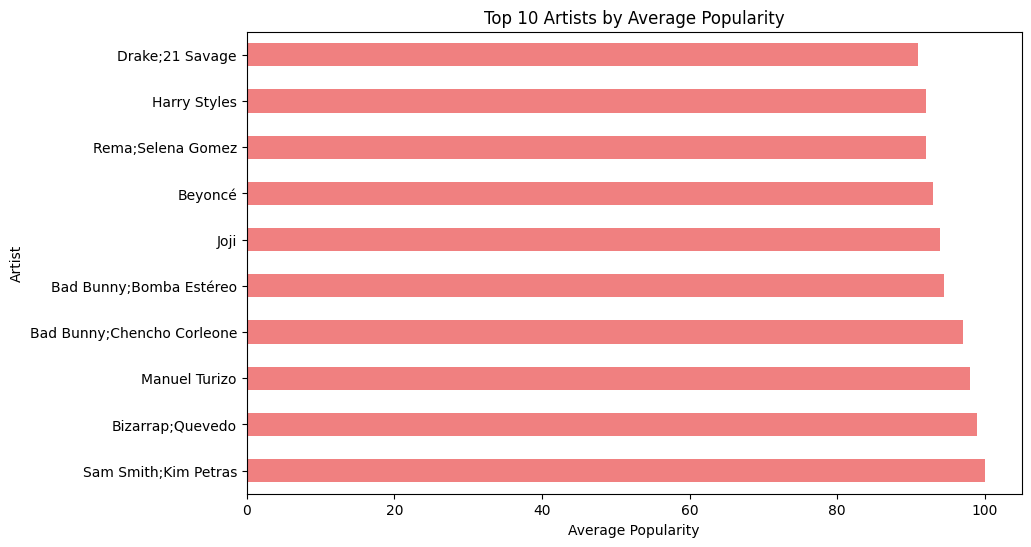

In [154]:
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
artist_popularity.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()


#### Top 10 Albums by Average Popularity

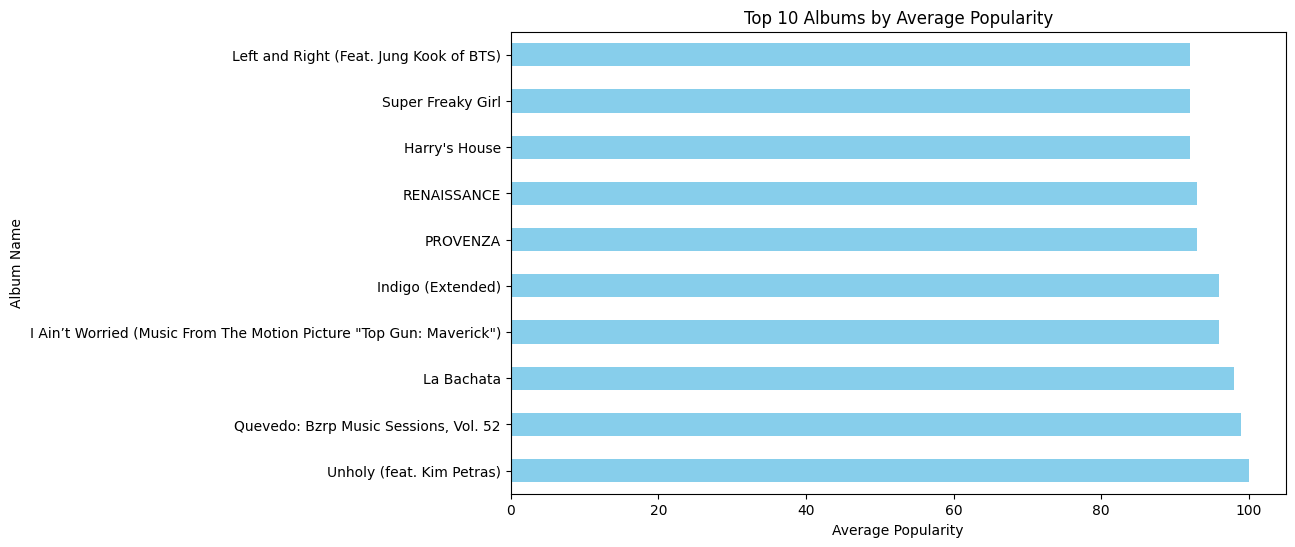

In [155]:
album_popularity = df.groupby('album_name')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
album_popularity.plot(kind='barh', color='skyblue')
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Album Name')
plt.show()


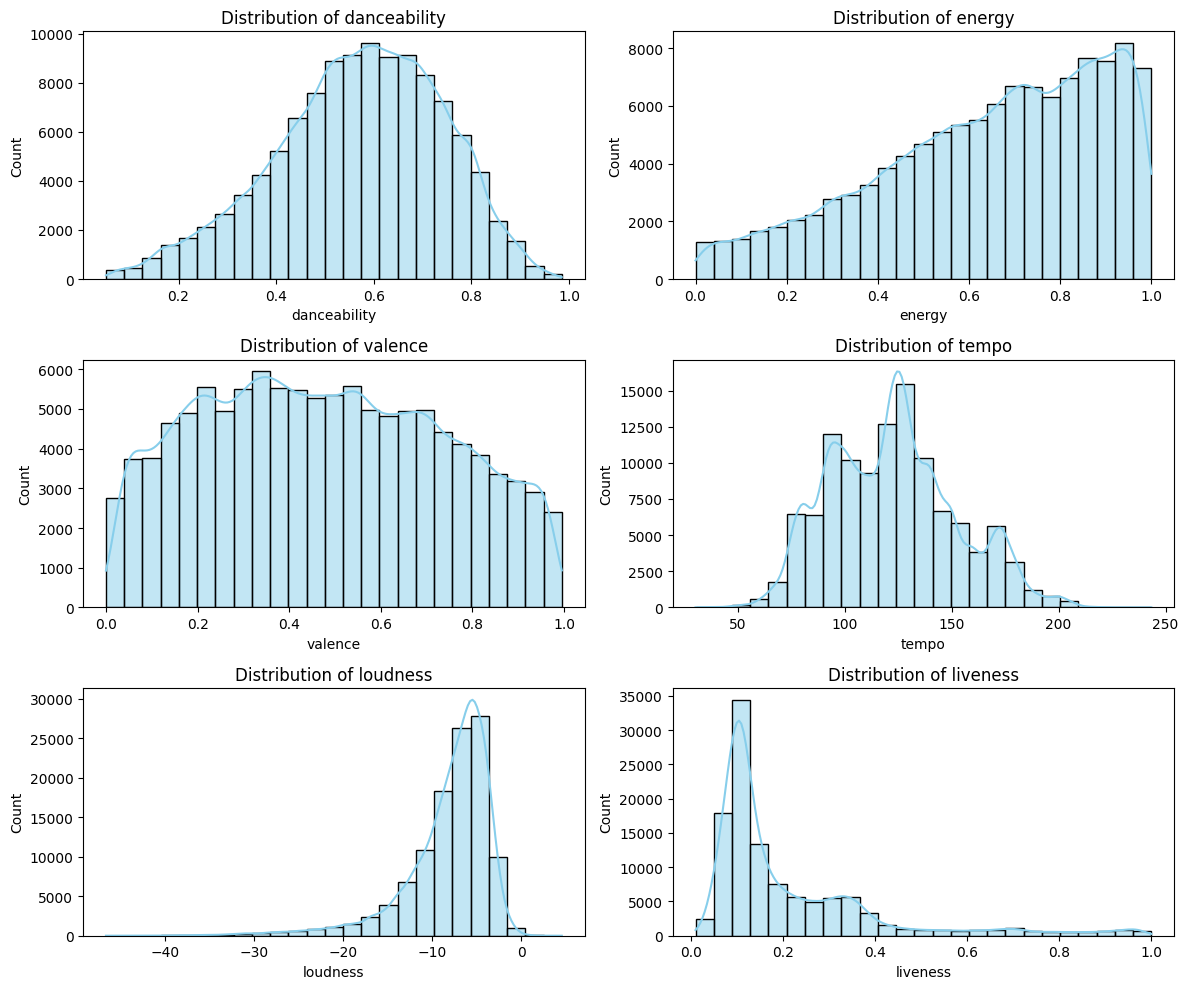

In [156]:
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'liveness']
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, color='skyblue', bins=25, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

## Data Analysis

In [182]:
df.select_dtypes(exclude=['object'])

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,binary_popularity
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,1
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,1
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,1
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,0
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,0
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,0
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,0


In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [185]:
cols_to_scale = ['duration_ms', 'tempo']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [192]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
popularity,112863.0,3.326934e+01,22.333646,0.000000,17.000000,35.00000,50.000000,100.000000
duration_ms,112863.0,9.871535e-17,1.000004,-2.004551,-0.506947,-0.14303,0.314685,47.255145
explicit,112863.0,8.564366e-02,0.279838,0.000000,0.000000,0.00000,0.000000,1.000000
danceability,112863.0,5.688367e-01,0.171772,0.051300,0.458000,0.58200,0.695000,0.985000
energy,112863.0,6.436844e-01,0.249659,0.000020,0.475000,0.68600,0.854000,1.000000
key,112863.0,5.312326e+00,3.560344,0.000000,2.000000,5.00000,8.000000,11.000000
loudness,112863.0,-8.199521e+00,4.945812,-46.591000,-9.955000,-6.97500,-4.991000,4.532000
mode,112863.0,6.372416e-01,0.480798,0.000000,0.000000,1.00000,1.000000,1.000000
speechiness,112863.0,8.441262e-02,0.104344,0.022100,0.035900,0.04900,0.084600,0.965000
acousticness,112863.0,3.122653e-01,0.330916,0.000000,0.016700,0.16600,0.591000,0.996000


# Linear Regression

In [200]:
formula = "popularity ~ duration_ms + explicit + danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + valence + tempo + time_signature"
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     210.4
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:40:24   Log-Likelihood:            -5.0925e+05
No. Observations:              112863   AIC:                         1.019e+06
Df Residuals:                  112848   BIC:                         1.019e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.9671      1.030  

Our R-squared value is 0.025 which means that our model only explains 2.5% variance in popularity. This means that there may be other factors not included in our dataset that influence our target variable popularity. Many predictors have p-values < 0.05, meaning they have a significant impoact on popularity.  

In [197]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: duration_ms:  1.061
VIF: explicit:  1.140
VIF: danceability:  1.525
VIF: energy:  4.309
VIF: key:  1.021
VIF: loudness:  3.284
VIF: mode:  1.042
VIF: speechiness:  1.223
VIF: acousticness:  2.445
VIF: instrumentalness:  1.466
VIF: liveness:  1.141
VIF: valence:  1.579
VIF: tempo:  1.092
VIF: time_signature:  1.062


All VIF are less than 5 meaning that multicollinearity is not a major concern. Our highest VIF are energy: 4.268 and loudness: 3.286.

In [198]:
import statsmodels.api as sm
dw_stat = sm.stats.durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 0.5714994324746295


Our Durbin-Watson statistic is 0.571 suggests positive autocorrelation in the residuals. 

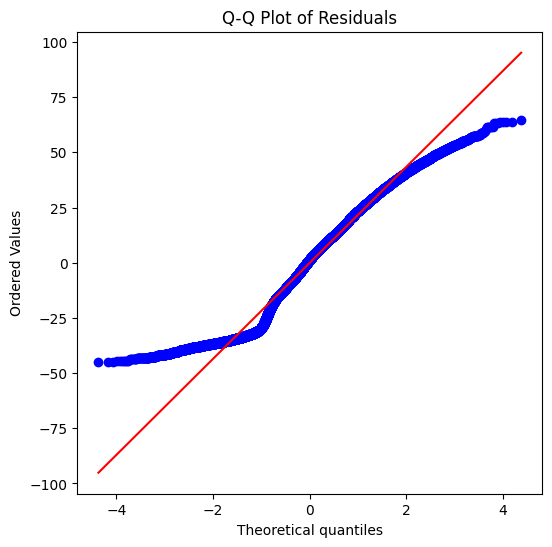

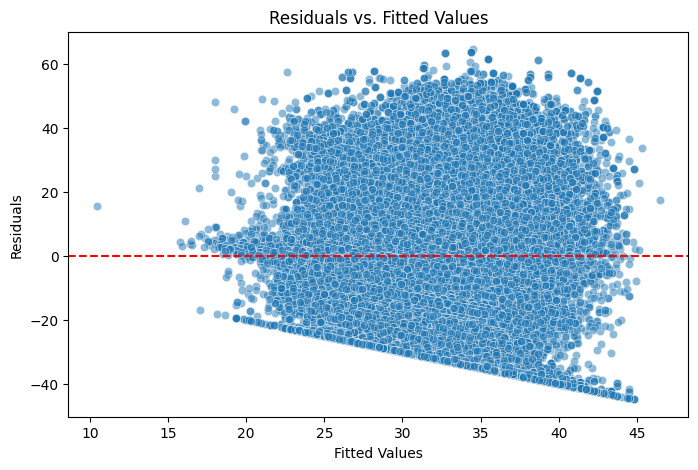

In [199]:
import matplotlib.pyplot as plt  
import scipy.stats as stats

residuals = model.resid

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# homoscedasticity check
fitted_values = model.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()


Homoscedasticity is not satisfied from the Residuals vs. Fitted Values becaue there is a pattern with the residuals against the fitted values. There is heteroscedasticity.

The residuals in the Q-Q plot deviate significantly on both tails. There are heavy tails which suggests non-linearity. Three is non normality based off of the Q-Q plot.

# Logistic Regression

In [201]:
df['popularity'].value_counts()

popularity
0      15887
22      2324
21      2306
44      2263
1       2122
       ...  
98         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [202]:
summary

,count,mean,std,min,25%,50%,75%,max
popularity,112863.0,3.326934e+01,22.333646,0.000000,17.000000,35.00000,50.000000,100.000000
duration_ms,112863.0,9.871535e-17,1.000004,-2.004551,-0.506947,-0.14303,0.314685,47.255145
explicit,112863.0,8.564366e-02,0.279838,0.000000,0.000000,0.00000,0.000000,1.000000
danceability,112863.0,5.688367e-01,0.171772,0.051300,0.458000,0.58200,0.695000,0.985000
energy,112863.0,6.436844e-01,0.249659,0.000020,0.475000,0.68600,0.854000,1.000000
key,112863.0,5.312326e+00,3.560344,0.000000,2.000000,5.00000,8.000000,11.000000
loudness,112863.0,-8.199521e+00,4.945812,-46.591000,-9.955000,-6.97500,-4.991000,4.532000
mode,112863.0,6.372416e-01,0.480798,0.000000,0.000000,1.00000,1.000000,1.000000
speechiness,112863.0,8.441262e-02,0.104344,0.022100,0.035900,0.04900,0.084600,0.965000
acousticness,112863.0,3.122653e-01,0.330916,0.000000,0.016700,0.16600,0.591000,0.996000


In [203]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre',
       'binary_popularity'],
      dtype='object')

In [204]:

df["binary_popularity"] = (df["popularity"] > 50).astype(int)

features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

pop_features = df.dropna(subset=features + ["binary_popularity"])

train, test = train_test_split(df.dropna(subset=features + ["binary_popularity"]), test_size=0.2, random_state=42, stratify=df["binary_popularity"])

formula = "binary_popularity ~ " + " + ".join(features)

logit_model = smf.logit(formula=formula, data=train).fit()

display(logit_model.summary())

test["pred_prob"] = logit_model.predict(test)
test["pred_class"] = (test["pred_prob"] > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.537704
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      binary_popularity   No. Observations:                90290
Model:                          Logit   Df Residuals:                    90275
Method:                           MLE   Df Model:                           14
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                 0.03304
Time:                        17:42:47   Log-Likelihood:                -48549.
converged:                       True   LL-Null:                       -50208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3009      0.128     -2.352      0.019      -0.552      -0.050
duration_ms         -0.1549      0.011    -14.150      0.000      -0.176      -0.133
explicit             0.4142      0.028     14.710      0.000       0.359       0.469
danceability         0.7640      0.057     13.316      0.000       0.652       0.876
energy              -0.7274      0.067    -10.829      0.000      -0.859      -0.596
key                 -0.0013      0.002     -0.568      0.570      -0.006       0.003
loudness             0.0126      0.003      4.124      0.000       0.007       0.019
mode                -0.1322      0.017     -7.954      0.000      -0.165      -0.100
speechiness         -1.7619      0.105    -16.749      0.000      -1.968      -1.556
acousticness        -0.5408      0.038    -14.162      0.000      -0.616      -0.466
instrumentalness    -0.8375      0.034    -24.742      0.000      -0.904      -0.771
liveness            -0.9300      0.051    -18.366      0.000      -1.029      -0.831
valence             -0.9313      0.039    -23.927      0.000      -1.008      -0.855
tempo               -0.0209      0.008     -2.495      0.013      -0.037      -0.004
time_signature       0.1000      0.028      3.620      0.000       0.046       0.154
====================================================================================
"""

Our R-squared value is very low meaning our predictors explain only 3.3% of the variance in song popularity. All of the p-values are statistically significant (except for key, which has a p=0.57)

In [211]:
print(accuracy_score(test["binary_popularity"], test["pred_class"]))
print(roc_auc_score(test["binary_popularity"], test["pred_prob"]))
print(confusion_matrix(test["binary_popularity"], test["pred_class"]))
print(precision_score(test["binary_popularity"], test["pred_class"]))
print(recall_score(test["binary_popularity"], test["pred_class"]))
print(f1_score(test["binary_popularity"], test["pred_class"]))

0.754928454348115
0.6225312056750554
[[17005    52]
 [ 5480    36]]
0.4090909090909091
0.006526468455402465
0.01284796573875803


In [212]:
# remove key from features
features = ['duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

pop_features = df.dropna(subset=features + ["binary_popularity"])

train, test = train_test_split(df.dropna(subset=features + ["binary_popularity"]), test_size=0.2, random_state=42, stratify=df["binary_popularity"])

formula = "binary_popularity ~ " + " + ".join(features)

improved_logit_model = smf.logit(formula=formula, data=train).fit()

display(improved_logit_model.summary())

test["pred_prob"] = improved_logit_model.predict(test)
test["pred_class"] = (test["pred_prob"] > 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.537706
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      binary_popularity   No. Observations:                90290
Model:                          Logit   Df Residuals:                    90276
Method:                           MLE   Df Model:                           13
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                 0.03303
Time:                        18:23:10   Log-Likelihood:                -48549.
converged:                       True   LL-Null:                       -50208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3081      0.127     -2.420      0.016      -0.558      -0.059
duration_ms         -0.1550      0.011    -14.156      0.000      -0.176      -0.134
explicit             0.4143      0.028     14.715      0.000       0.359       0.470
danceability         0.7638      0.057     13.314      0.000       0.651       0.876
energy              -0.7276      0.067    -10.832      0.000      -0.859      -0.596
loudness             0.0126      0.003      4.121      0.000       0.007       0.019
mode                -0.1310      0.016     -7.945      0.000      -0.163      -0.099
speechiness         -1.7629      0.105    -16.759      0.000      -1.969      -1.557
acousticness        -0.5407      0.038    -14.160      0.000      -0.616      -0.466
instrumentalness    -0.8376      0.034    -24.744      0.000      -0.904      -0.771
liveness            -0.9298      0.051    -18.363      0.000      -1.029      -0.831
valence             -0.9318      0.039    -23.950      0.000      -1.008      -0.856
tempo               -0.0209      0.008     -2.496      0.013      -0.037      -0.004
time_signature       0.1000      0.028      3.621      0.000       0.046       0.154
====================================================================================
"""

In [213]:
print(accuracy_score(test["binary_popularity"], test["pred_class"]))
print(roc_auc_score(test["binary_popularity"], test["pred_prob"]))
print(confusion_matrix(test["binary_popularity"], test["pred_class"]))
print(precision_score(test["binary_popularity"], test["pred_class"]))
print(recall_score(test["binary_popularity"], test["pred_class"]))
print(f1_score(test["binary_popularity"], test["pred_class"]))

0.754928454348115
0.6225312056750554
[[17005    52]
 [ 5480    36]]
0.4090909090909091
0.006526468455402465
0.01284796573875803


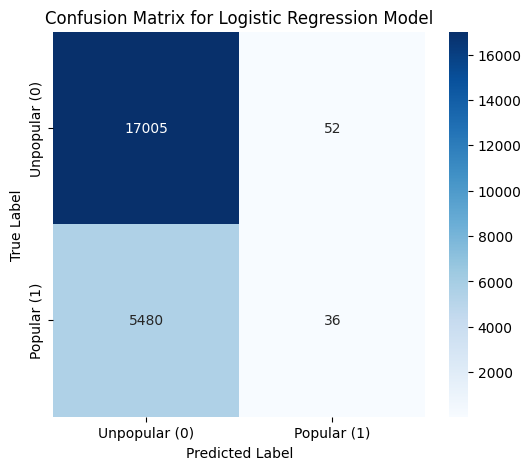

In [214]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(test["binary_popularity"], test["pred_class"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Unpopular (0)", "Popular (1)"], yticklabels=["Unpopular (0)", "Popular (1)"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()
